#  Project 2 : Toxic Tweets Dataset : NLP Problem

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Convert text to Bag of Words representation

Training and Evaluating DecisionTreeClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6472
           1       0.94      0.91      0.93      4877

    accuracy                           0.94     11349
   macro avg       0.94      0.93      0.94     11349
weighted avg       0.94      0.94      0.94     11349

Confusion Matrix:
[[6177  295]
 [ 425 4452]]
ROC-AUC Score: 0.9333552232889528


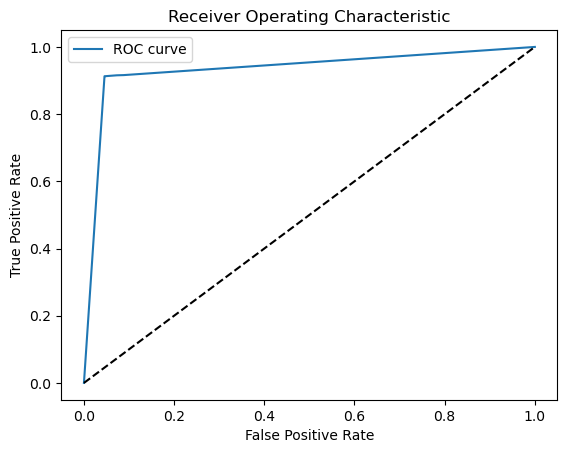

Training and Evaluating KNeighborsClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6472
           1       0.95      0.80      0.87      4877

    accuracy                           0.90     11349
   macro avg       0.91      0.89      0.89     11349
weighted avg       0.90      0.90      0.90     11349

Confusion Matrix:
[[6282  190]
 [ 960 3917]]
ROC-AUC Score: 0.9359406257975872


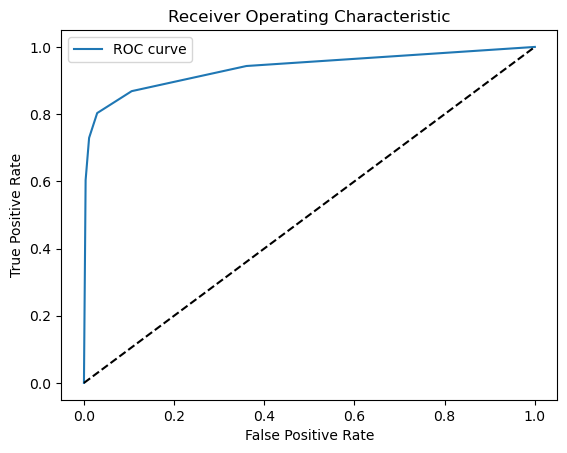

Training and Evaluating MultinomialNB
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      6472
           1       0.89      0.93      0.91      4877

    accuracy                           0.92     11349
   macro avg       0.92      0.92      0.92     11349
weighted avg       0.92      0.92      0.92     11349

Confusion Matrix:
[[5894  578]
 [ 344 4533]]
ROC-AUC Score: 0.9717515339654639


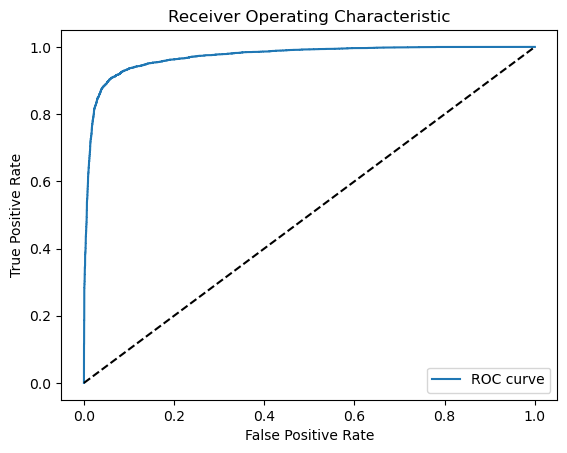

Training and Evaluating RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6472
           1       0.93      0.92      0.93      4877

    accuracy                           0.94     11349
   macro avg       0.94      0.94      0.94     11349
weighted avg       0.94      0.94      0.94     11349

Confusion Matrix:
[[6158  314]
 [ 396 4481]]
ROC-AUC Score: 0.9825648214304272


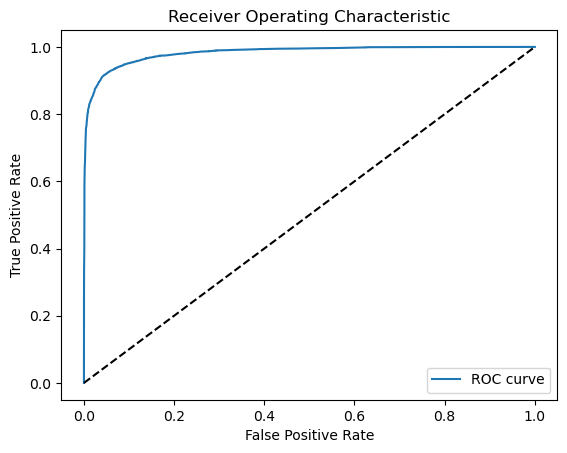

Training and Evaluating SVC
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6472
           1       0.97      0.90      0.93      4877

    accuracy                           0.94     11349
   macro avg       0.95      0.94      0.94     11349
weighted avg       0.95      0.94      0.94     11349

Confusion Matrix:
[[6318  154]
 [ 482 4395]]
ROC-AUC Score: 0.9824188162290491


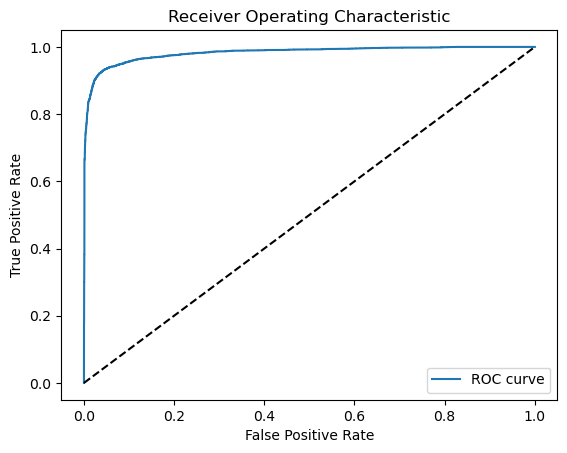

In [2]:
# Step 1: Convert CSV file to a pandas DataFrame
data = pd.read_csv(r"D:\Files\FinalBalancedDataset.csv")
data['tweet'] = data['tweet'].str.lower()  # Convert text to lowercase

def text_cleaning(text):
    tokenizer = RegexpTokenizer(r"\w+")  # w+ means only alphanumeric characters
    tokens = tokenizer.tokenize(text)
    
    stop_words = set(stopwords.words('english'))  # Set of English stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    cleaned_text = " ".join(tokens)
    return cleaned_text

# Function to train, evaluate and plot results for a given classifier
def train_evaluate_plot(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    
    probs = classifier.predict_proba(X_test)[:, 1]  # Use the predicted probabilities for positive class
    
    print("ROC-AUC Score:", roc_auc_score(y_test, probs))
    
    fpr, tpr, _ = roc_curve(y_test, probs)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')  # Random guess curve
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend()
    plt.show()

    
# Apply text cleaning to 'tweet' column
data['cleaned_tweet'] = data['tweet'].apply(text_cleaning)

# Convert text to Bag of Words representation
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(data['cleaned_tweet'])

# Split data into training and testing sets
X = bow_matrix  # Features (Bag of Words representation)
y = data['Toxicity']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of classifiers
classifiers = [DecisionTreeClassifier(), KNeighborsClassifier(), MultinomialNB(), RandomForestClassifier(), SVC(probability=True)]

# Train, Evaluate, and Plot results for each classifier
for classifier in classifiers:
    print("Training and Evaluating", classifier.__class__.__name__)
    train_evaluate_plot(classifier, X_train, X_test, y_train, y_test)

### Convert text to TF-IDF representation

Training and Evaluating DecisionTreeClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6472
           1       0.92      0.92      0.92      4877

    accuracy                           0.93     11349
   macro avg       0.93      0.93      0.93     11349
weighted avg       0.93      0.93      0.93     11349

Confusion Matrix:
[[6102  370]
 [ 393 4484]]
ROC-AUC Score: 0.9316762505978341


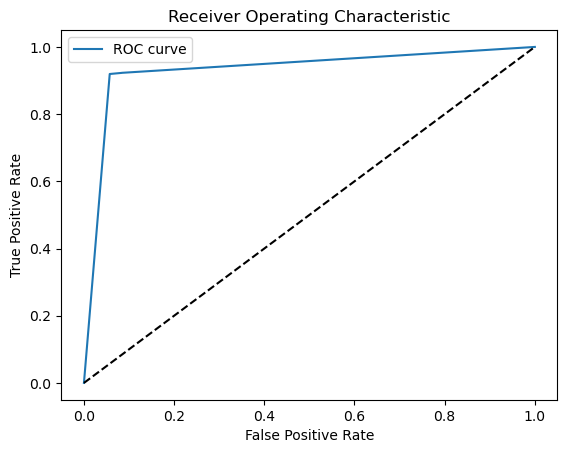

Training and Evaluating RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6472
           1       0.94      0.92      0.93      4877

    accuracy                           0.94     11349
   macro avg       0.94      0.94      0.94     11349
weighted avg       0.94      0.94      0.94     11349

Confusion Matrix:
[[6185  287]
 [ 388 4489]]
ROC-AUC Score: 0.9829812459431557


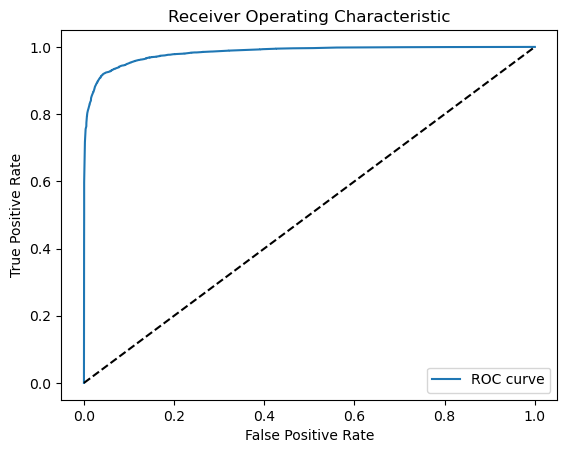

Training and Evaluating MultinomialNB
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6472
           1       0.91      0.90      0.90      4877

    accuracy                           0.92     11349
   macro avg       0.92      0.91      0.91     11349
weighted avg       0.92      0.92      0.92     11349

Confusion Matrix:
[[6020  452]
 [ 495 4382]]
ROC-AUC Score: 0.9711265328566038


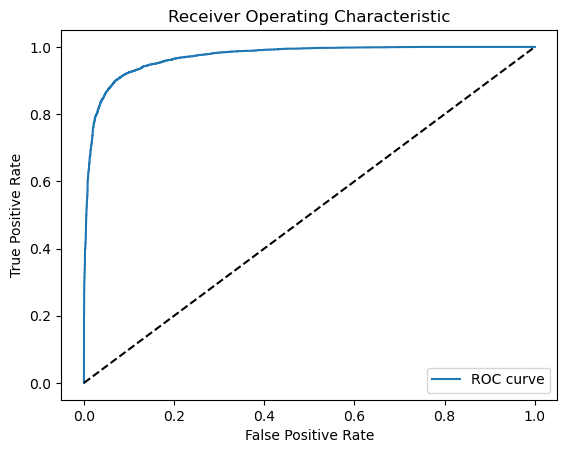

Training and Evaluating KNeighborsClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.99      0.75      6472
           1       0.94      0.13      0.23      4877

    accuracy                           0.62     11349
   macro avg       0.77      0.56      0.49     11349
weighted avg       0.75      0.62      0.53     11349

Confusion Matrix:
[[6429   43]
 [4243  634]]
ROC-AUC Score: 0.6807746839241636


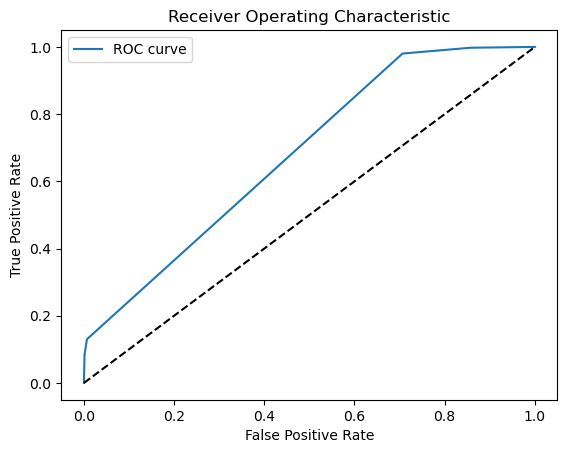

Training and Evaluating SVC
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6472
           1       0.97      0.90      0.93      4877

    accuracy                           0.94     11349
   macro avg       0.95      0.94      0.94     11349
weighted avg       0.95      0.94      0.94     11349

Confusion Matrix:
[[6332  140]
 [ 494 4383]]
ROC-AUC Score: 0.985300506172486


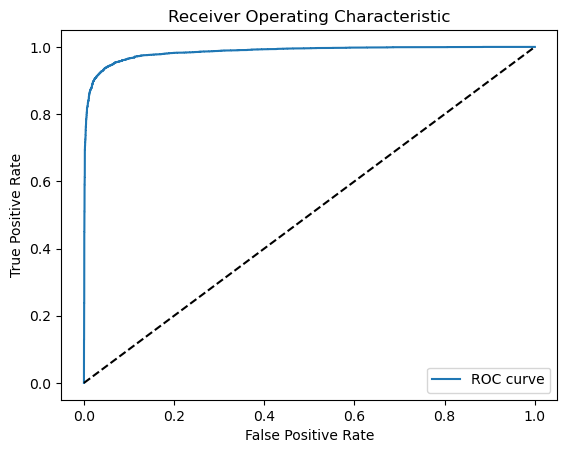

In [3]:
# Convert text to TF-IDF representation
tfvectorizer = TfidfVectorizer()
tfidf_matrix = tfvectorizer.fit_transform(data['cleaned_tweet'])

# Split data into training and testing sets
X = tfidf_matrix  # Features (TF-IDF representation)
y = data['Toxicity']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train, Evaluate and Plot results for each classifier
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), MultinomialNB(), KNeighborsClassifier(), SVC(probability=True)]

for classifier in classifiers:
    print("Training and Evaluating", classifier.__class__.__name__)
    train_evaluate_plot(classifier, X_train, X_test, y_train, y_test)

#### Bag of Words

    Decision Tree classifier : accuracy - 0.94
    Random Forest classifier : accuracy - 0.94
    Naive Bayes mode : accuracy - 0.92
    K-NN classifier : accuracy - 0.90
    SVM classifier : accuracy - 0.94

#### TF-IDF

    Decision Tree classifier : accuracy - 0.93
    Random Forest classifier : accuracy - 0.94
    Naive Bayes mode : accuracy - 0.92
    K-NN classifier : accuracy - 0.62
    SVM classifier : accuracy - 0.94

